<font size=6><b>Lec04. Tree 모델
> 종류
- ID3(Iterative Dichotomiser) : 반복적 이분법 --> 고전적
    - entropy : p(x)log_2P(x) 
        - 사건이 일어나냐, 일어나지 않느냐의 확률값으로 이야기함
        - 이산형(카데고리성) 데이터에 적합
- CART(Class and Regression Tree)
    - jini index : 1-p(x)^2
        - overfitting --> depth, max_leaf_nodes 조절하기

    
> 기본 개념
- 주로 분류에서 사용하지만 회귀에서도 지원
- 분류 : 들어와있는 데이터들 중 개수가 많은 쪽으로 구분
- 회귀 : 들어와있는 데이터의 평균값으로 데이터를 구분

> 구성 요소
- 가지의 끝 = leaf node
- 깊이 = depth   --> depth 당 피쳐 하나의 분기점이된다
    - 데이터를 완벽히 거르기위해 depth 끝까지 가게되면 overfitting -->  완벽히 분리되지 않더라도 depth 중간까지만 분류

> 활용    
- root node는 어떤 피쳐로 잡아야하나?
  - 지니, entropy
  - 지니가 0에 가까울때 까지 가지치기
- 가지치기는 어느정도가 적당한가?
  - 하이퍼파라미터 튜닝 
    

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# 빌트인 (Built-in) 데이터셋 활용

## 데이터 셋의 종류

- `load_boston`: 보스톤 집값 데이터
- `load_iris`: 아이리스 붓꽃 데이터
- `load_diabetes`: 당뇨병 환자 데이터
- `load_digits`: 손글씨 데이터
- `load_linnerud`: multi-output regression 용 데이터
- `load_wine`: 와인 데이터
- `load_breast_cancer`: 위스콘신 유방암 환자 데이터

## 데이터 셋 조회

sklearn.utils.Bunch 자료구조를 활용

**key-value** 형식 사전(dict)형 구조

공통 **key**
- `data`: 샘플 데이터
- `target`: Label 데이터
- `feature_names`: Feature 이름
- `target_names`: Label 이름
- `DESCR`: 데이터 설명
- `filename`: csv 파일 저장 위치

# Data Load

In [2]:
from IPython.display import Image
Image(url='https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png')

- **sepal**: 꽃받침
- **petal**: 꽃잎

In [3]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# EDA

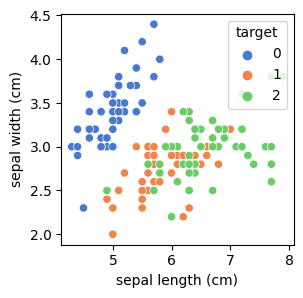

In [4]:
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='muted')
plt.plot()
plt.show()

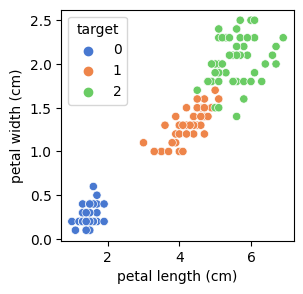

In [5]:
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', palette='muted')
plt.plot()
plt.show()

# entropy
- 무질서한 정도 , 정보량
- 매번 일어나는 사건에 대한 정보량이 크다 
    - 정보량이 많다 = 엔트로피가 높다 --> 무질서한 방향쪽으로 가지치기 
- 부모 노드와의 갭차이가 크다는 것은 순도에 가까움, 갭차이가 작다는 것은 가치치기 할 것이 많다는 것
- 엔트로피가 큰 쪽으로 가지치기
    - <font  color='red'><b>엔트로피가 크다 = 분류대상이 된다</font></b> --> 엔트로피가 0이 되도록 가지치기 
    - 엔트로피가 0 = 분류할 것이 없다(=pure)   
- 엔트로피 최대치 = 반반 확률 = 정보량 가장 많다 --> 분류하기 가장 어려움

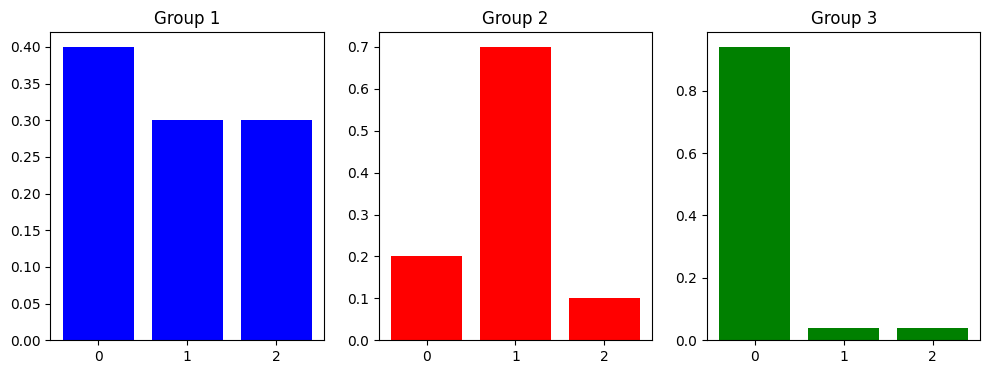

In [29]:
group_1 = np.array([0.4,0.3,0.3])
group_2 = np.array([0.2, 0.7,0.1])
group_3 = np.array([0.94,0.04,0.04])

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

<img src="https://miro.medium.com/max/1122/0*DkWdyGidNSfdT1Nu.png" width=300>
- p : 사건이 일어날 확률(0~1사이의 값)

In [30]:
def entropy(x):
    return (-x*np.log2(x)).sum()

In [31]:

entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

Group 1: 1.571
Group 2: 1.157
Group 3: 0.455


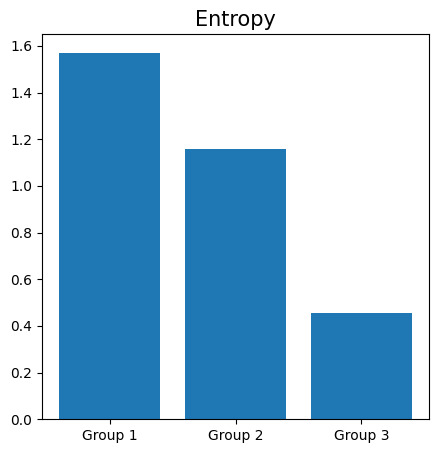

In [32]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

# 지니 계수 (Gini Index)
- 순도
- 지니 높다 =  순도 낮다(무엇인가 섞여있다)
  - <font  color='red'><b>지니계수가 높다 = 분류의 대상이 된다</font></b> --> 지니계수를 낮추기 위해 가지치기한다
- 지니 0 = 순도 높다   --> 지니가 낮을수록 순도 높다  --> 더이상 가지치기 하지 않음

<img src="http://www.learnbymarketing.com/wp-content/uploads/2016/02/gini-index-formula.png" width=200>
- 확률을 제곱(p^2) : 전체에서 해당 사건이 일어날 확률의 제곱을 뺌

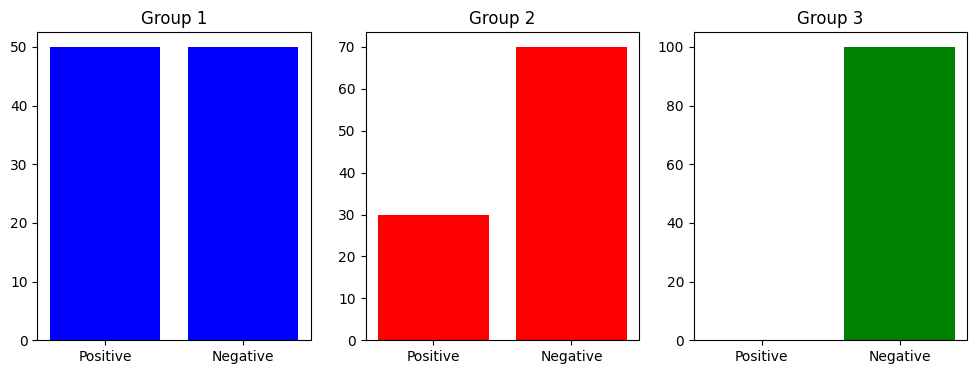

In [10]:
def gini(x):
    return 1 - ((x / x.sum())**2).sum()


group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [11]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


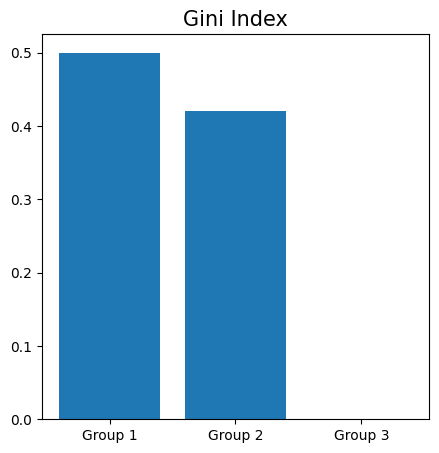

In [12]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [gini_1, gini_2, gini_3])
plt.title('Gini Index', fontsize=15)
plt.show()

# DecisionTree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
SEED = 42

In [14]:
y = df['target']
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(f'Accuracy Score: {accuracy:.3f}')

Accuracy Score: 0.933


# 트리 시각화

In [15]:
# ! pip install graphviz

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


정확도: 93.33 %


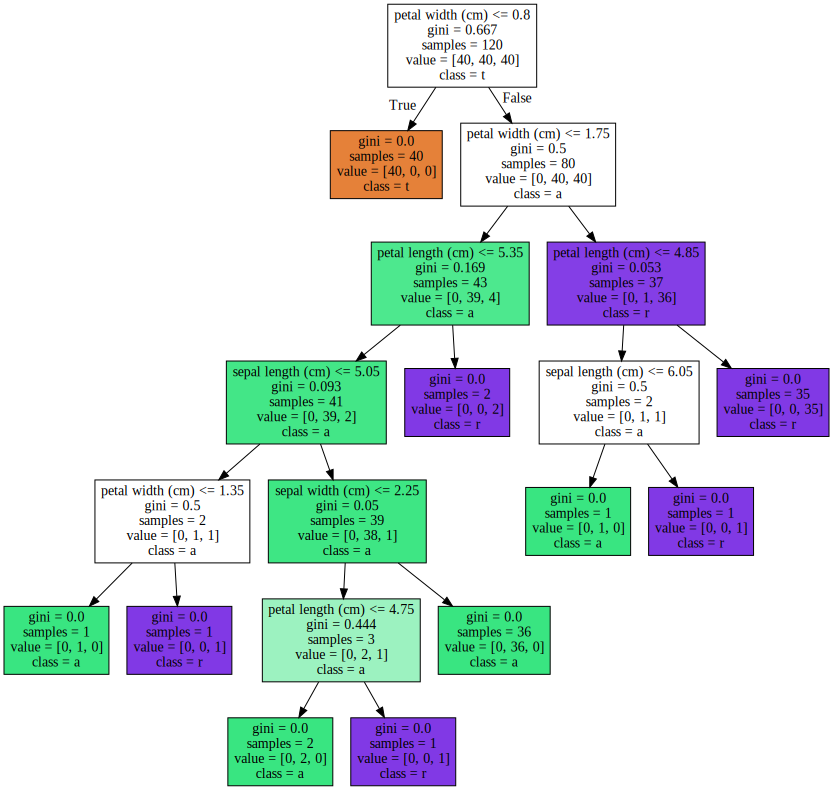

In [17]:
from sklearn.tree import export_graphviz  # 지니와 엔트로피 계산
from sklearn.metrics import accuracy_score
import graphviz # 그래프 : .dot만 읽음

def show_trees(tree):
    export_graphviz(tree, out_file="tree.dot", class_names='target', # y
                    feature_names=X_train.columns, # x
                    precision=3, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
        
    #-------------그래프와 상관 없음-------------------------
    pred = tree.predict(X_test)
    print('정확도: {:.2f} %'.format(accuracy_score(y_test, pred) * 100))
    #-------------------------------------------------------

    display(graphviz.Source(dot_graph))
show_trees(tree)


## max_depth 
* 최대 트리의 깊이 (기본 값 : None, 제한 없음)

정확도: 93.33 %


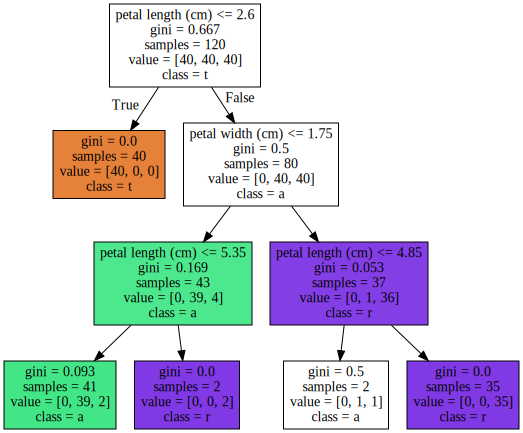

In [18]:
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(X_train, y_train)
show_trees(tree)

## min_sample_split
* 노드 내에서 분할이 필요한 최소의 샘플 수 (기본값 : 2)

정확도: 93.33 %


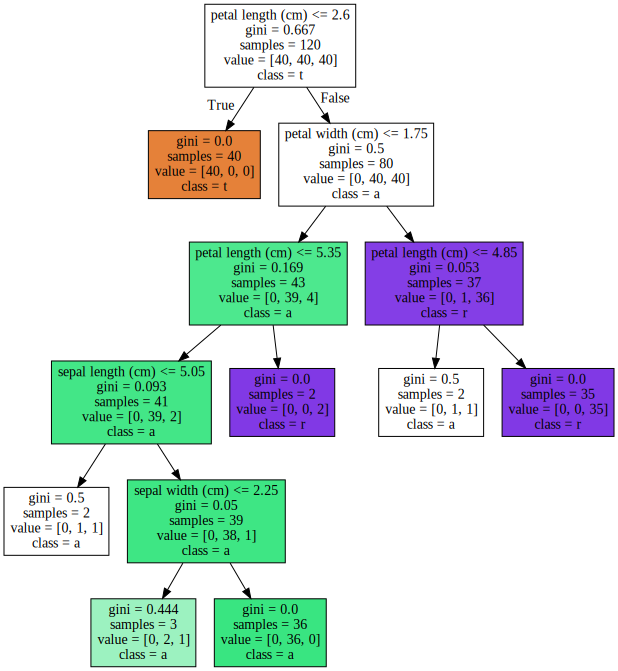

In [19]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20,  random_state=SEED) # 조건이 상충되는경우 하나의 조건에만 해당해도 멈춤(or 조건)
tree.fit(X_train, y_train)
show_trees(tree)

## min_samples_leaf 
* 말단 노드의 최소 샘플 수  (기본값 : 1)

## max_leaf_nodes 
* 말단 노드의 최대 갯수, 과대 적합 방지용 (기본 값: None, 제한 없음)

정확도: 96.67 %


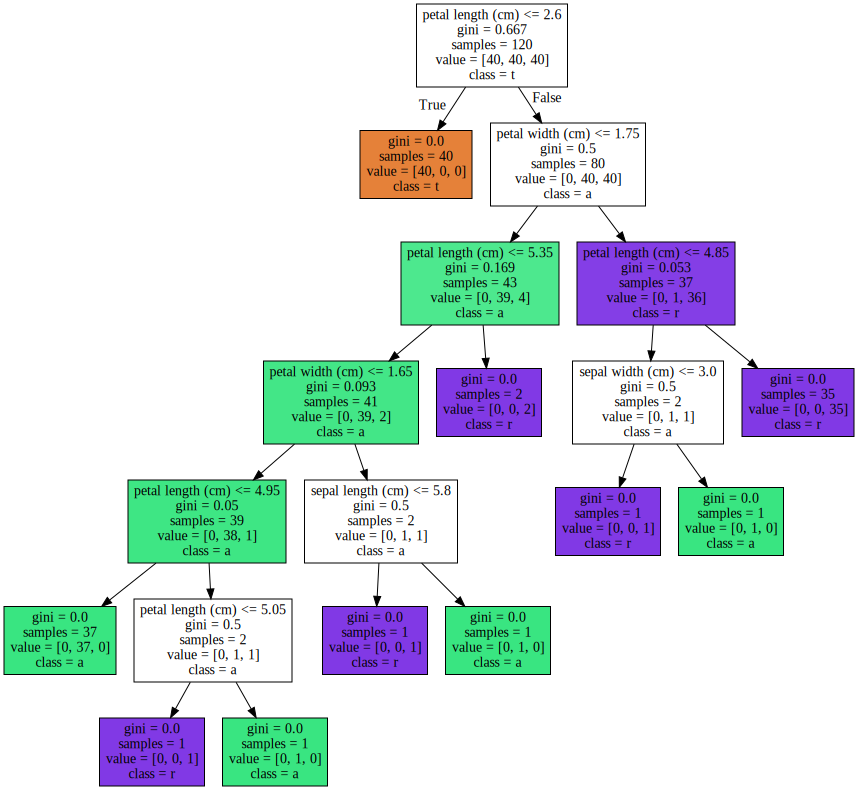

In [20]:
tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, random_state=SEED)
tree.fit(X_train, y_train)
show_trees(tree)

## max_features
* 최적의 분할을 찾기 위해 고려할 피처의 수
* ensemble일 때만 조정하기

정확도: 96.67 %


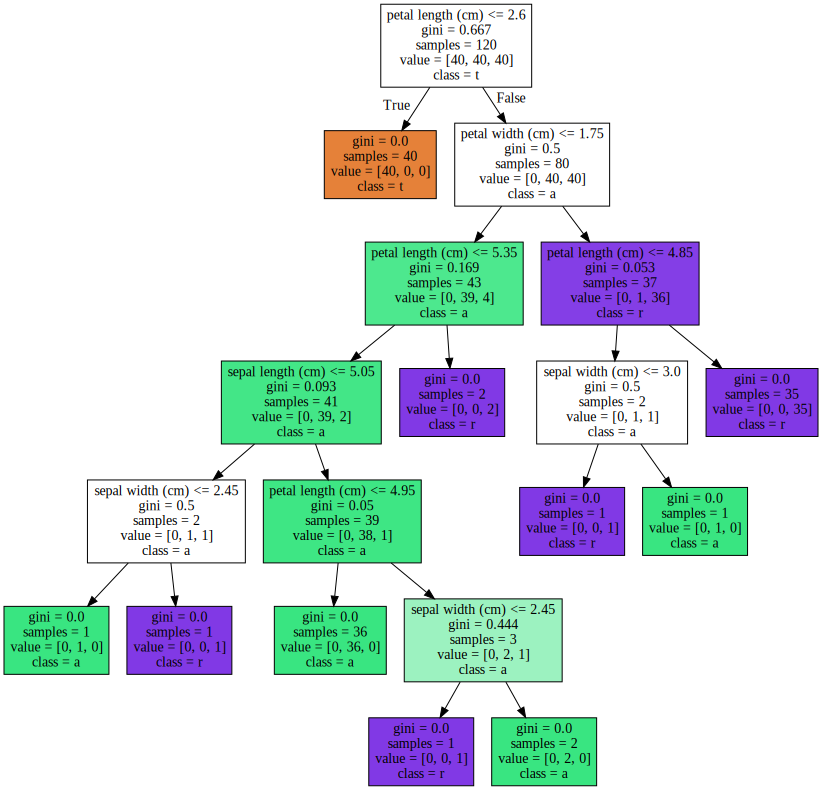

In [21]:
tree = DecisionTreeClassifier(max_depth=7, max_features=0.8, random_state=SEED)
tree.fit(X_train, y_train)
show_trees(tree)

# feature 중요도 

In [22]:
# 주요 피쳐 뽑기
tree.feature_importances_

array([0.010702  , 0.04166667, 0.56265333, 0.384978  ])

In [23]:
# df = pd.DataFrame(tree.feature_importances_).sort_values('importance', ascending=False)
df = pd.DataFrame(list(zip(df.columns, tree.feature_importances_)), columns=['feature', 'importance']).sort_values('importance', ascending=False)

# df = df.reset_index(drop=True)
df.head(15)

# pedal만 가지고 97%는 분류 가능
# sepal length (cm)는 가장 의미 없는 피쳐

,feature,importance
2,petal length (cm),0.562653
3,petal width (cm),0.384978
1,sepal width (cm),0.041667
0,sepal length (cm),0.010702


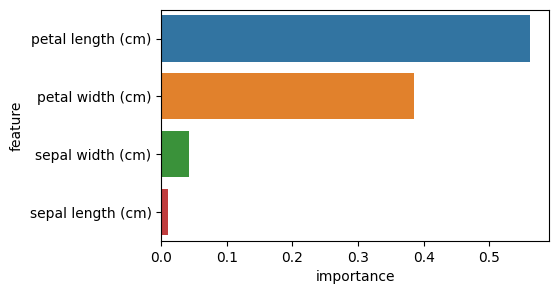

In [24]:
plt.figure(figsize=(5, 3))
sns.barplot(y='feature', x='importance', data=df)
plt.show()